### 3.5.4 出力層のニューロンの数

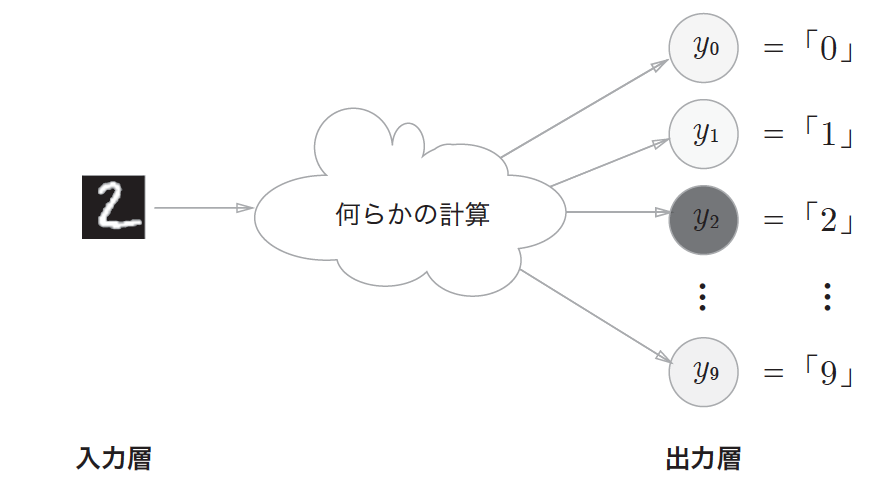

## 3.6 手書き数字認識

参考URL
https://qiita.com/python_walker/items/e4d2ae5b7196cb07402b

In [3]:
import urllib.request # URLを扱うためのモジュール

url_base = 'http://yann.lecun.com/exdb/mnist/'

key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

import os
working_directory=os.getcwd() # Pythonが実行されている作業ディレクトリの取得(get current working directory)
dataset_dir = working_directory  # 作業ディレクトリを下記でダウンロードするデータセットの格納先パスとして保存

In [14]:
# for v in key_file.values():
#     print(f'Data→{v}')
#     file_path = dataset_dir + '/' + v
#     urllib.request.urlretrieve(url_base + v, file_path)

In [19]:
for k in key_file.keys():
    v=key_file[k]
    print(f'{k}  : {v}')
    file_path = dataset_dir + '/' + v #ダウンロードするファイルのデータセット
    urllib.request.urlretrieve(url_base + v, file_path) # Web上のファイルのダウンロード

train_img  : train-images-idx3-ubyte.gz
train_label  : train-labels-idx1-ubyte.gz
test_img  : t10k-images-idx3-ubyte.gz
test_label  : t10k-labels-idx1-ubyte.gz


◆ MNISTデータの仕様<br>
https://weblabo.oscasierra.net/python/ai-mnist-data-detail.html

■画像データ

</h3><p>　画像データが保存されたファイル(train-images-idx3-ubyte / t10k-images-idx3-ubyte)は、次のような仕様になっています。</p>
<table>
<thead><tr>
<th style="text-align:left">offset</th>
<th style="text-align:left">type</th>
<th style="text-align:left">value</th>
<th style="text-align:left">description</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left">0000</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">0x00000803(2051)</td>
<td style="text-align:left">識別子(定数)</td>
</tr>
<tr>
<td style="text-align:left">0004</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">60000</td>
<td style="text-align:left">画像データの数</td>
</tr>
<tr>
<td style="text-align:left">0008</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">28</td>
<td style="text-align:left">1画像あたりのデータ行数</td>
</tr>
<tr>
<td style="text-align:left">0012</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">28</td>
<td style="text-align:left">1画像あたりのデータ列数</td>
</tr>
<tr>
<td style="text-align:left">0016</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 255</td>
<td style="text-align:left">1つめの画像の1ピクセル目の値</td>
</tr>
<tr>
<td style="text-align:left">0017</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 255</td>
<td style="text-align:left">1つめの画像の2ピクセル目の値</td>
</tr>
<tr>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
</tr>
<tr>
<td style="text-align:left">xxxx</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 255</td>
<td style="text-align:left">最後の画像の784ピクセル目の値</td>
</tr>
</tbody>
</table>
<p>ピクセルの値は、0 から 255 までの値で、0 が白を, 255 が黒を表します。</p>



8ビットカラー 【8-bit color】 256色 (2の8乗) <br>
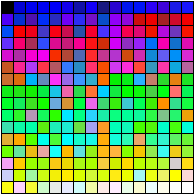

https://atmarkit.itmedia.co.jp/ait/articles/2001/22/news012.html
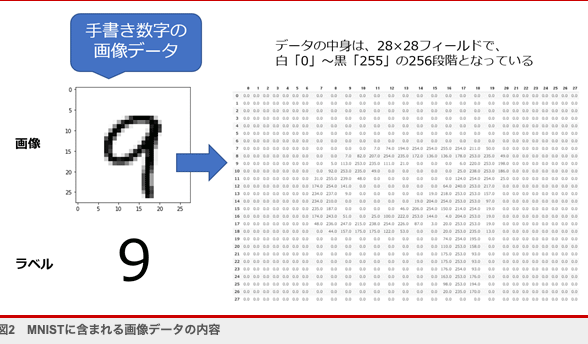

In [39]:
import gzip
import numpy as np

file_path = dataset_dir +  '/' + key_file['train_img']    #試しにtrain_imgを見てみる

with gzip.open(file_path, 'rb') as f: #バイナリモードで読み込み
    data = np.frombuffer(f.read(), np.uint8, offset=16) # https://stackoverflow.com/questions/22236749/numpy-what-is-the-difference-between-frombuffer-and-fromstring
    
print(f'data\n{data}\n')
print(f'data\n{data.dtype}\n')
print(f'data\n{len(data)}\n')
print(f'data\n{len(data.shape)}\n')
print(f'data/28\n{len(data) % (28**2)}\n')

data
[0 0 0 ... 0 0 0]

data
uint8

data
47040000

data
1

data/28
0



■ラベルデータ

ラベルデータが保存されたファイル(train-labels-idx1-ubyte / t10k-labels-idx1-ubyte)は、次のような仕様になっています。</p>
<table>
<thead><tr>
<th style="text-align:left">offset</th>
<th style="text-align:left">type</th>
<th style="text-align:left">value</th>
<th style="text-align:left">description</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left">0000</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">0x00000801(2049)</td>
<td style="text-align:left">識別子(定数)</td>
</tr>
<tr>
<td style="text-align:left">0004</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">60000 or 10000</td>
<td style="text-align:left">ラベルデータの数</td>
</tr>
<tr>
<td style="text-align:left">0008</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 9</td>
<td style="text-align:left">1つ目のデータのラベル</td>
</tr>
<tr>
<td style="text-align:left">0009</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 9</td>
<td style="text-align:left">2つ目のデータのラベル</td>
</tr>
<tr>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
</tr>
<tr>
<td style="text-align:left">xxxx</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 9</td>
<td style="text-align:left">最後のデータのラベル</td>
</tr>
</tbody>
</table>

data
[0 0 0 ... 0 0 0]

data
uint8

data
47040000

data
1

data/28
0



In [23]:
data

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [33]:
def load_img(file_name):
    file_path = dataset_dir + '/' + file_name
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 784)

    return data

def load_label(file_name):
    file_path = dataset_dir + '/' + file_name
    with gzip.open(file_path, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return labels

dataset = {}
dataset['train_img'] = load_img(key_file['train_img'])
dataset['train_label'] = load_label(key_file['train_label'])
dataset['test_img'] = load_img(key_file['test_img'])
dataset['test_label'] = load_label(key_file['test_label'])

In [34]:
dataset['train_img']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
np.ndim(dataset['train_img'])

2

In [36]:
import pickle

save_file = dataset_dir + '/mnist.pkl'    #拡張子は.pkl
with open(save_file, 'wb') as f:
    pickle.dump(dataset, f, -1)    #-1は最も高いプロトコルバージョンで保存する
                                   #ことを指定している

In [37]:
with open(save_file, 'rb') as f:
    dataset = pickle.load(f)

In [38]:
dataset

{'train_img': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'train_label': array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 'test_img': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'test_label': array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)}

In [39]:
print(f'dataset[train_img] : {dataset["train_img"].shape}\n')
print(f'dataset[train_label] : {dataset["train_label"].shape}\n')

dataset[train_img] : (60000, 784)

dataset[train_label] : (60000,)



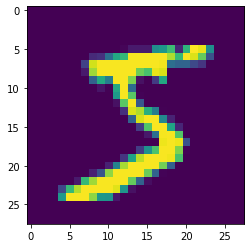

dataset[train_label] : 5



In [40]:
import matplotlib.pyplot as plt

example = dataset['train_img'][0].reshape((28, 28))

plt.imshow(example)
plt.show()

print(f'dataset[train_label] : {dataset["train_label"][0]}\n')

In [41]:
def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み

    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか

    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

In [42]:
# def to_one_hot(label):
#     T = np.zeros((label.size, 10))
#     for i in range(label.size):
#         T[i][label[i]] = 1
#     return T

# dataset['train_label'] = to_one_hot(dataset['train_label'])
# dataset['train_label'].shape    #-> (60000, 10)

In [43]:
# def normalize(key):
#     dataset[key] = dataset[key].astype(np.float32)
#     dataset[key] /= 255

#     return dataset[key]

# dataset['train_img'] = normalize('train_img')

In [44]:
dataset

{'train_img': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'train_label': array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 'test_img': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'test_label': array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)}

In [51]:
# coding: utf-8
import numpy as np


def identity_function(x):
    return x


def step_function(x):
    return np.array(x > 0, dtype=np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
    

def relu(x):
    return np.maximum(0, x)


def relu_grad(x):
    grad = np.zeros_like(x)
    grad[x>=0] = 1
    return grad
    

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)


def sum_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)


In [52]:
# coding: utf-8
import sys, os
# sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
# from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
#     (x_train, t_train), (x_test, t_test) = (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [53]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

In [55]:
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 3.6.3 バッチ処理

In [57]:
x,_=get_data()
network = init_network()

In [58]:
W1,W2,W3=network['W1'], network['W2'], network['W3']

In [60]:
print(f'x.shape : {x.shape}\n')
print(f'x[0].shape : {x[0].shape}\n')
print(f'W1.shape : {W1.shape}\n')
print(f'W2.shape : {W2.shape}\n')
print(f'W3.shape : {W3.shape}\n')

x.shape : (10000, 784)

x[0].shape : (784,)

W1.shape : (784, 50)

W2.shape : (50, 100)

W3.shape : (100, 10)



In [61]:
x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [158]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import os
import gzip
import pickle
import os
import numpy as np

# dataset={}

url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}


working_directory=os.getcwd()
dataset_dir = working_directory   #データを保存する場所
# dataset_dir = os.path.dirname(os.path.abspath(__file__))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784

dataset={}

class class_mnist:
           
    def __init__(self):
        self.download_mnist
        self.dataset={}
#         self.dataset = self._convert_numpy
        self.dataset = self._convert_numpy
        print("Creating pickle file ...")
        with open(save_file, 'wb') as f:
            pickle.dump(dataset, f, -1)
        print("Done!")
        
      
    def _download(self,file_name):
        file_path = dataset_dir + "/" + file_name

        if os.path.exists(file_path):
            return

        print("Downloading " + file_name + " ... ")
        headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
        request = urllib.request.Request(url_base+file_name, headers=headers)
        response = urllib.request.urlopen(request).read()
        with open(file_path, mode='wb') as f:
            f.write(response)
        print("Done")

    def download_mnist(self):
        for v in key_file.values():
            self._download(v)

    def _load_label(self,file_name):
        file_path = dataset_dir + "/" + file_name

        print("Converting " + file_name + " to NumPy Array ...")
        with gzip.open(file_path, 'rb') as f:
                labels = np.frombuffer(f.read(), np.uint8, offset=8)
        print("Done")

        return labels

    def _load_img(self,file_name):
        file_path = dataset_dir + "/" + file_name

        print("Converting " + file_name + " to NumPy Array ...")
        with gzip.open(file_path, 'rb') as f:
                data = np.frombuffer(f.read(), np.uint8, offset=16)
        data = data.reshape(-1, img_size)
        print("Done")

        return data

    def _convert_numpy(self):
#         self.dataset = {}
        self.dataset['train_img'] =  self._load_img(key_file['train_img'])
        self.dataset['train_label'] = self._load_label(key_file['train_label'])
        self.dataset['test_img'] = self._load_img(key_file['test_img'])
        self.dataset['test_label'] = self._load_label(key_file['test_label'])
        print({self.dataset})

        return dataset

#     def init_mnist():
#         download_mnist()
#         dataset = _convert_numpy()
#         print("Creating pickle file ...")
#         with open(save_file, 'wb') as f:
#             pickle.dump(dataset, f, -1)
#         print("Done!")

    def _change_one_hot_label(self,X):
        T = np.zeros((X.size, 10))
        for idx, row in enumerate(T):
            row[X[idx]] = 1

        return T


    def load_mnist(self,normalize=True, flatten=True, one_hot_label=False):
        """MNISTデータセットの読み込み

        Parameters
        ----------
        normalize : 画像のピクセル値を0.0~1.0に正規化する
        one_hot_label :
            one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
            one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
        flatten : 画像を一次元配列に平にするかどうか

        Returns
        -------
        (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
        """
        if not os.path.exists(save_file):
#             init_mnist()
            self.__init__

        with open(save_file, 'rb') as f:
            self.dataset = pickle.load(f)

        if normalize:
            for key in ('train_img', 'test_img'):
                self.dataset[key] = self.dataset[key].astype(np.float32)
                self.dataset[key] /= 255.0

        if one_hot_label:
            self.dataset['train_label'] = self._change_one_hot_label(self.dataset['train_label'])
            self.dataset['test_label'] = self._change_one_hot_label(self.dataset['test_label'])

        if not flatten:
             for key in ('train_img', 'test_img'):
                self.dataset[key] = self.dataset[key].reshape(-1, 1, 28, 28)
        print(self.dataset)

        return (self.dataset['train_img'], self.dataset['train_label']), (self.dataset['test_img'], self.dataset['test_label'])


In [159]:
mnist_data=class_mnist()

Creating pickle file ...
Done!


In [161]:
dataset

{}

In [160]:
mnist_data.load_mnist

<bound method class_mnist.load_mnist of <__main__.class_mnist object at 0x7ff9115287c0>>

In [157]:
(x_train, t_train), (x_test, t_test) = mnist_data.load_mnist()

KeyError: 'train_img'

In [96]:
x_train, t_train,x_test, t_test =mnist_data.load_mnist

TypeError: cannot unpack non-iterable method object

In [12]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath(__file__))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み

    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか

    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()


NameError: name '__file__' is not defined